Ваша задача — реализовать алгоритм случайного леса для задачи классификации и применить его к набору данных.

Шаги выполнения задания:

Импортируйте необходимые библиотеки: numpy, pandas, sklearn.

Загрузите набор данных для задачи классификации. Вы можете использовать любой доступный набор данных или выбрать один из популярных, таких как Iris, Wine или MNIST.

Проведите предварительную обработку данных, включая масштабирование и разделение на обучающую и тестовую выборки.

Реализуйте алгоритм случайного леса. Включите в него функции для построения деревьев решений, выбора случайных признаков и голосования для принятия решений.

Обучите вашу модель случайного леса на обучающей выборке.

Оцените производительность модели на тестовой выборке, используя метрики классификации, такие как точность, полнота и F1-мера.

Проведите сравнение результатов вашей модели со стандартной реализацией случайного леса из библиотеки scikit-learn.

*Возьмем за основу датасет телекомов из предыдущего семинара - решаем задачу предсказания переходов клиентов к другому оператору*

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.copy_on_write = True

df = pd.read_csv("telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


*Проводим первичную обработку данных*

In [75]:
df = df.drop('State', axis=1)

In [76]:
from sklearn.preprocessing import LabelEncoder

In [77]:
l = LabelEncoder()
df['International plan'] = l.fit_transform(df['International plan'])
df['Voice mail plan'] = l.fit_transform(df['Voice mail plan'])
df['Churn'] = l.fit_transform(df['Churn'])

In [78]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   int64  
 1   Area code               3333 non-null   int64  
 2   International plan      3333 non-null   int64  
 3   Voice mail plan         3333 non-null   int64  
 4   Number vmail messages   3333 non-null   int64  
 5   Total day minutes       3333 non-null   float64
 6   Total day calls         3333 non-null   int64  
 7   Total day charge        3333 non-null   float64
 8   Total eve minutes       3333 non-null   float64
 9   Total eve calls         3333 non-null   int64  
 10  Total eve charge        3333 non-null   float64
 11  Total night minutes     3333 non-null   float64
 12  Total night calls       3333 non-null   int64  
 13  Total night charge      3333 non-null   float64
 14  Total intl minutes      3333 non-null   

*В датасете остались только числовые значения*

In [80]:
df.describe().T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
Account length,3333.000000,101.064806,39.822106,1.000000,74.000000,101.000000,127.000000,243.000000
Area code,3333.000000,437.182418,42.371290,408.000000,408.000000,415.000000,510.000000,510.000000
International plan,3333.000000,0.096910,0.295879,0.000000,0.000000,0.000000,0.000000,1.000000
Voice mail plan,3333.000000,0.276628,0.447398,0.000000,0.000000,0.000000,1.000000,1.000000
Number vmail messages,3333.000000,8.099010,13.688365,0.000000,0.000000,0.000000,20.000000,51.000000
Total day minutes,3333.000000,179.775098,54.467389,0.000000,143.700000,179.400000,216.400000,350.800000
Total day calls,3333.000000,100.435644,20.069084,0.000000,87.000000,101.000000,114.000000,165.000000
Total day charge,3333.000000,30.562307,9.259435,0.000000,24.430000,30.500000,36.790000,59.640000
Total eve minutes,3333.000000,200.980348,50.713844,0.000000,166.600000,201.400000,235.300000,363.700000
Total eve calls,3333.000000,100.114311,19.922625,0.000000,87.000000,100.000000,114.000000,170.000000


In [81]:
df.duplicated().sum()

0

*Дубликатов, пропущенных значений - нет*

*Создаем матрицу объект-признак X и вектор с целевой переменной (Churn) y.*

In [82]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

*Проверяем баланс классов*

In [83]:
df['Churn'].value_counts(sort = False)

,count
Churn,
0,2850
1,483


*По целевому показателю выборка не сбалансированная - данных с меньшим классом (положительное значение Churn) в 5,9 раз меньше, чем с отрицательным значением Churn*

Text(0.5, 1.0, 'Гистограмма распределения целевой переменной (Churn)')

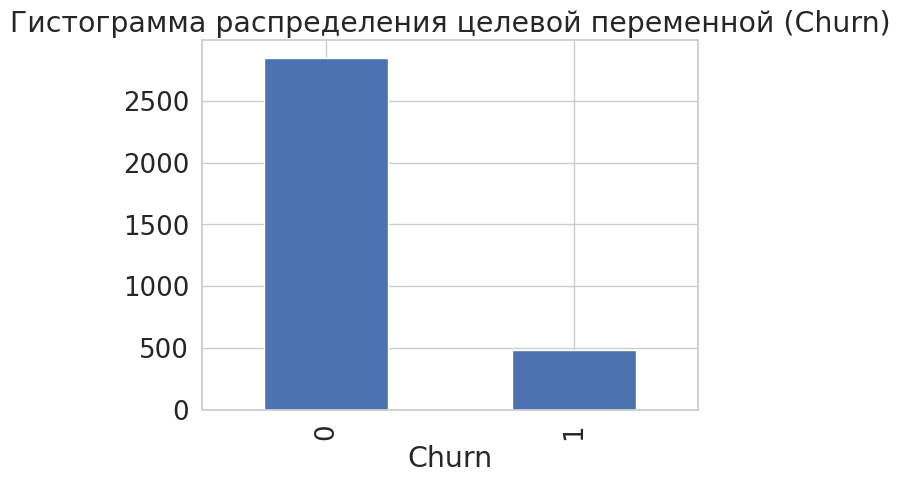

In [84]:
df['Churn'].value_counts().plot(kind='bar');
plt.title('Гистограмма распределения целевой переменной (Churn)')

*Разбиваем данные на тренировочную и тестовую части, размер тестовой части — 30%, стратифицированное разбиение в связи с дисбалансом классов*

In [85]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

*Масштабируем признаки*

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#X_train = pd.DataFrame(X_train, columns=X_train0.columns)
#X_test = pd.DataFrame(X_test, columns=X_test0.columns)

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn import metrics
import seaborn as sns

-------------------------------------------

**Бэггинг (RandomForestClessifier)**

*Строим BaseLine модель классификаци - RandomForestClassifier, с параметрами "из коробки"*

In [88]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       855
           1       0.92      0.72      0.81       145

    accuracy                           0.95      1000
   macro avg       0.94      0.86      0.89      1000
weighted avg       0.95      0.95      0.95      1000



*Имеем неплохие показатели - Recall 72% на минорном классе (какую долю реальных переходов к другому оператору удалось верно предсказать модели), показатель Precision (сколько из предсказанных переходов на тестовой выборке в реальности были переходами) 92%*

In [89]:
confusion_mat = confusion_matrix(y_test, y_pred1)
print("Точность:", accuracy_score(y_test, y_pred1))
print("Точность:", precision_score(y_test, y_pred1, average = 'binary'))
print("Полнота:", recall_score(y_test, y_pred1, average = 'binary'))
print("F1-мера:", f1_score(y_test, y_pred1, average = 'binary'))

Точность: 0.951
Точность: 0.9210526315789473
Полнота: 0.7241379310344828
F1-мера: 0.8108108108108109


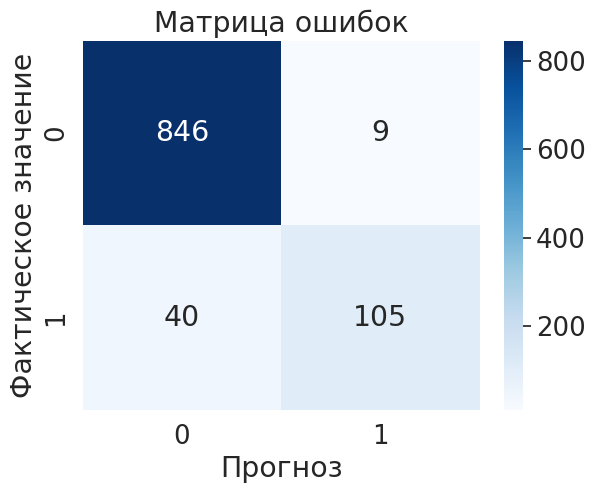

In [90]:
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap = "Blues")
plt.xlabel("Прогноз")
plt.ylabel("Фактическое значение")
plt.title("Матрица ошибок")
plt.show();

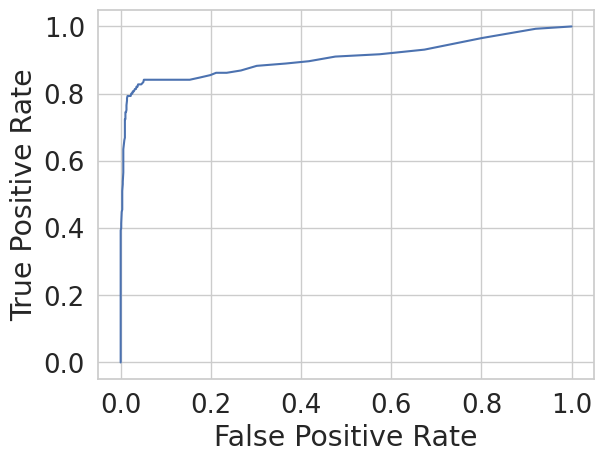

In [91]:
#Предсказываем вероятности
y_pred_proba1 = model1.predict_proba(X_test)[:, 1]
# Строим кривую ROC
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba1)
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [92]:
auc = metrics.roc_auc_score(y_test, y_pred_proba1)
print("AUC: %.3f" % auc)

AUC: 0.907


In [93]:
import plotly.graph_objs as go

trace = go.Scatter(x=fpr, y=tpr, mode='lines', name='AUC = %0.2f' % auc,
                   line=dict(color='darkorange', width=2))
reference_line = go.Scatter(x=[0,1], y=[0,1], mode='lines', name='Reference Line',
                            line=dict(color='navy', width=2, dash='dash'))
fig = go.Figure(data=[trace, reference_line])
fig.update_layout(title='Interactive ROC Curve',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')
fig.show()

*Показатель AUC (Area under Curve) - площади под кривой ROC - интерпретирует вероятность, с которой модель верно определит две точки (объекта), расположенные в разных классах, которые поданы ей на вход для анализа. В нашем случае это вероятность 90,7%. Показатель 50% (площадь под синей пунктирной кривой - вариант случайного выбора, рандомного угадывания).*

*Визуализируем важность признаков для предсказания целевого признака Churn:*

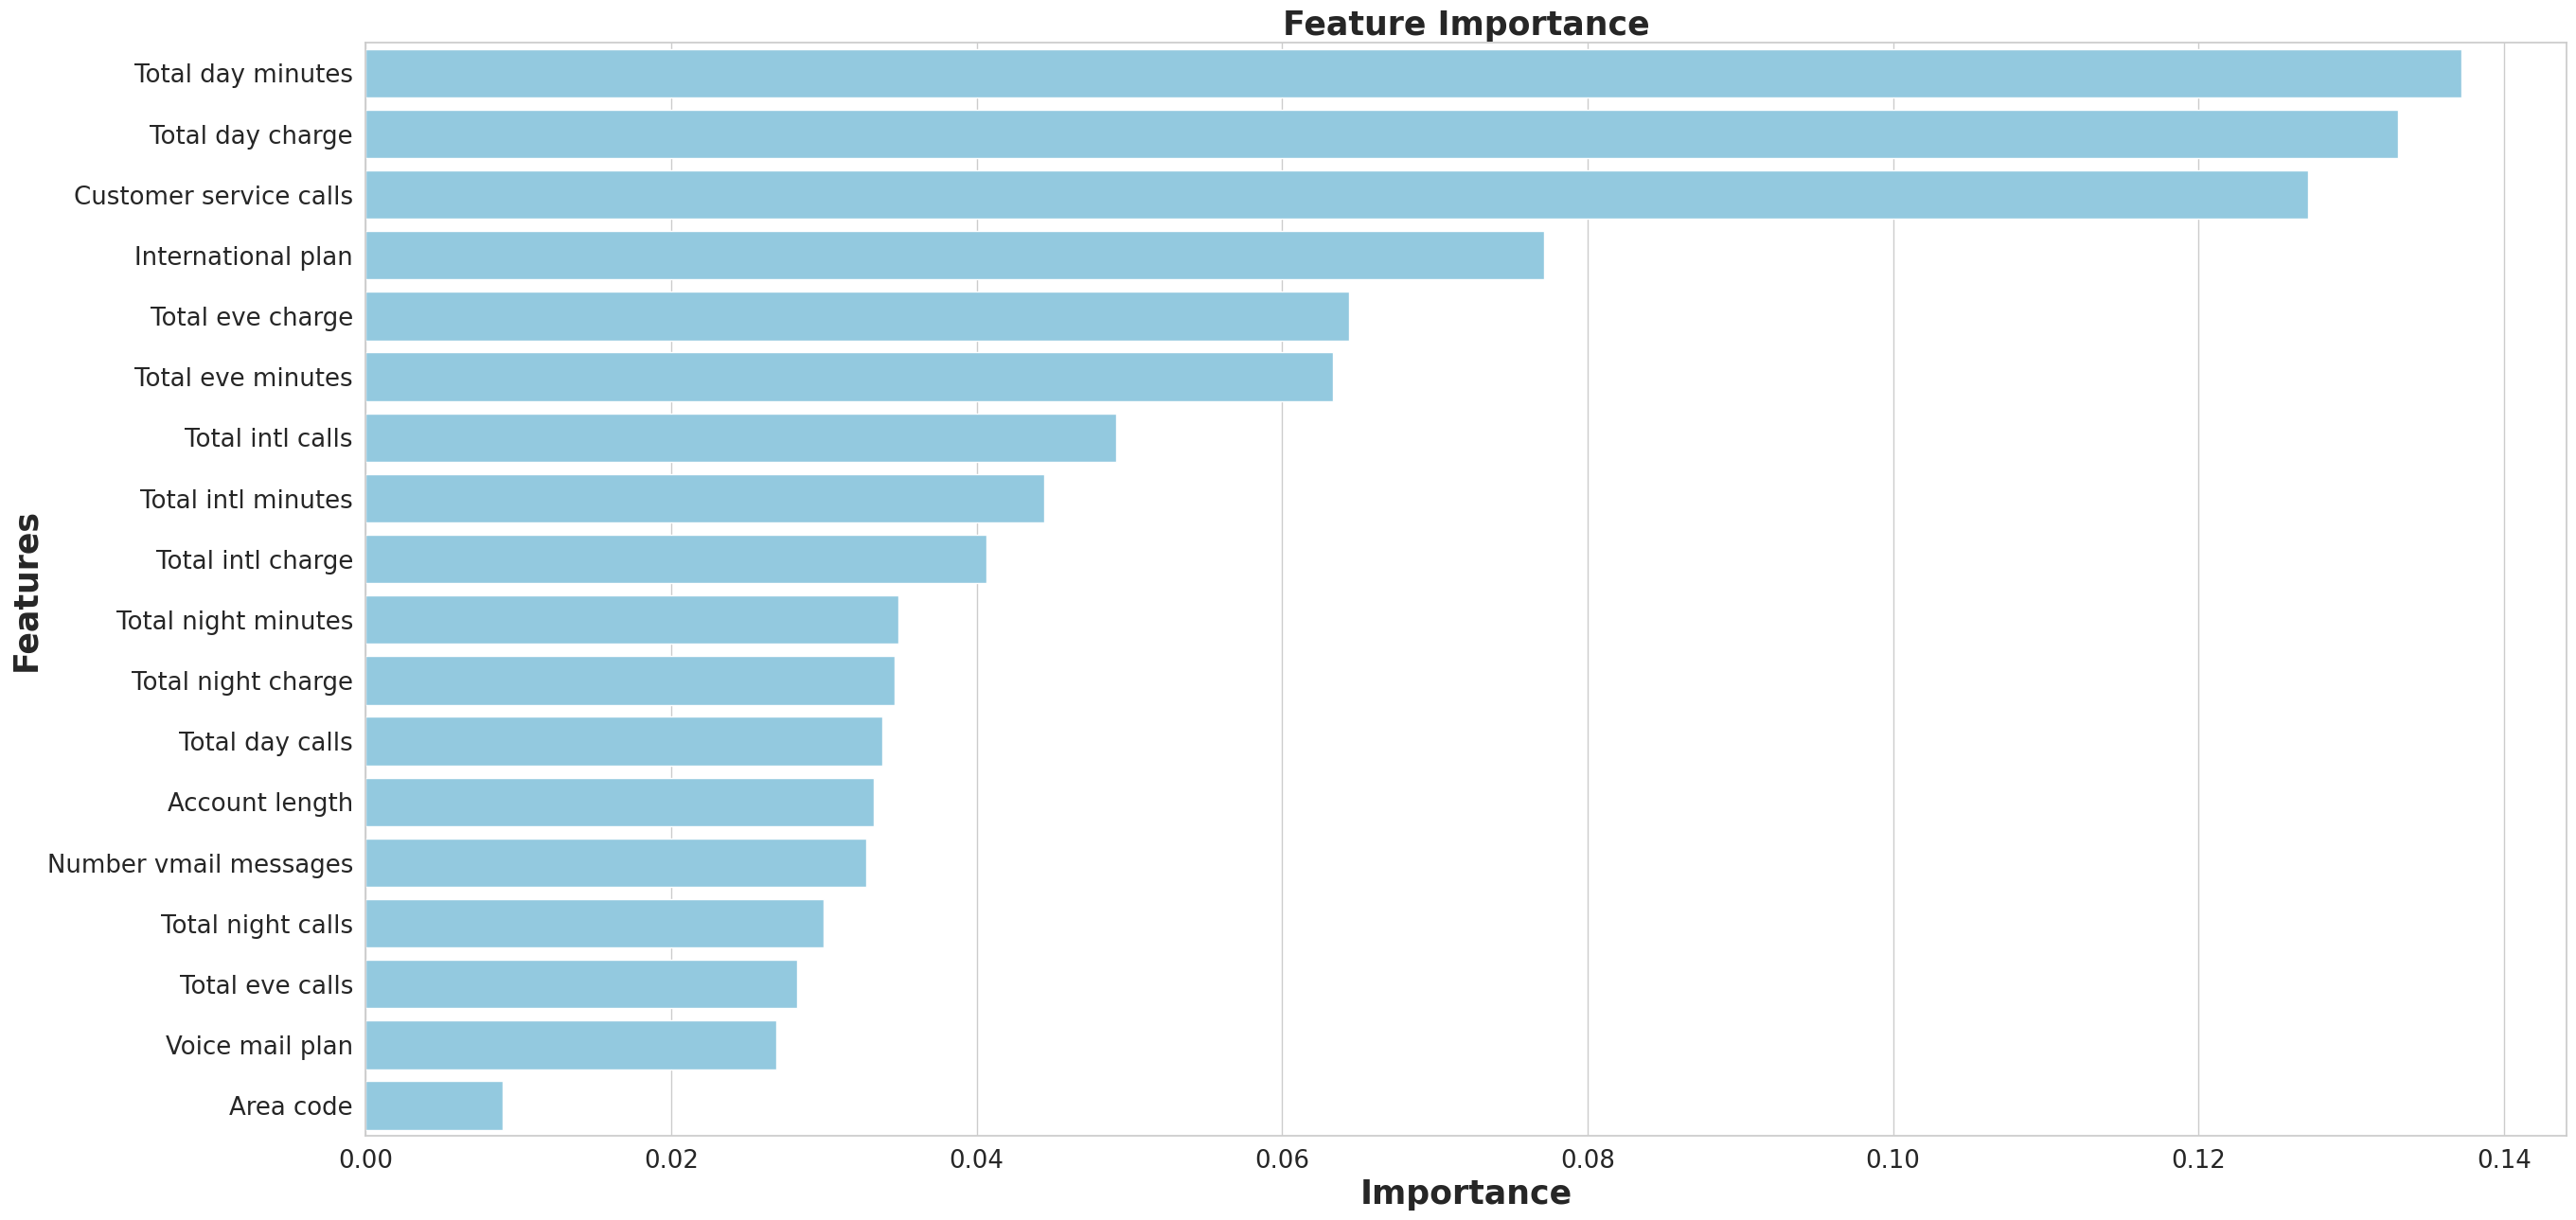

None

,Features,Gini-Importance
0,Total day minutes,0.137238
1,Total day charge,0.133035
2,Customer service calls,0.127173
3,International plan,0.077174
4,Total eve charge,0.064417
5,Total eve minutes,0.063314
6,Total intl calls,0.049169
7,Total intl minutes,0.044432
8,Total intl charge,0.040638
9,Total night minutes,0.034864


In [94]:
feats = {}
for feature, importance in zip(df.columns, model1.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

*Часть признаков не оказывают существенного влияния на целевой параметр*

---------------------------------


*Нами была использована модель RandomForestClassifier с гиперпараметрами "по умолчанию". Применим алгоритм GridSearchCV для нахождения оптимальных гиперпараметров в построении нашей модели. В качестве критерия выберем максимизацию показателя AUC (ROC)*

In [95]:
from sklearn.model_selection import GridSearchCV
# Функция для оценки модели с помощью перекрестной проверки
def evaluate_model(model1, X_train, y_train):
    scores = cross_val_score(model1, X_train, y_train, scoring='roc_auc', cv=5)
    return scores.mean()

# Поиск гиперпараметров с помощью сетки параметров
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [3, 9, 11],
    'min_samples_split': [2, 7, 10],
    'min_samples_leaf': [2, 5]
}

grid_search = GridSearchCV(estimator=model1, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Лучшие гиперпараметры для модели (Grid Search): {grid_search.best_params_}")
print(f"Лучшая оценка для модели (Grid Search): {grid_search.best_score_:.2f}")

Лучшие гиперпараметры для модели из коробки (Grid Search): {'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 300}
Лучшая оценка для модели из коробки (Grid Search): 0.92


*Применим найденные гиперпараметры в построении модели, применим сбалансированные по классам веса*

In [116]:
model2 = RandomForestClassifier(n_estimators = 300, max_depth= 9, min_samples_split=7, min_samples_leaf=2, class_weight='balanced')
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       855
           1       0.81      0.78      0.80       145

    accuracy                           0.94      1000
   macro avg       0.89      0.87      0.88      1000
weighted avg       0.94      0.94      0.94      1000



*Поиск гиперпараметров с помощью GridSearchCV не привел к существенному улучшению метрик качества модели*

In [97]:
confusion_mat = confusion_matrix(y_test, y_pred2)
print("Точность:", accuracy_score(y_test, y_pred2))
print("Точность:", precision_score(y_test, y_pred2, average = 'binary'))
print("Полнота:", recall_score(y_test, y_pred2, average = 'binary'))
print("F1-мера:", f1_score(y_test, y_pred2, average = 'binary'))

Точность: 0.94
Точность: 0.8057553956834532
Полнота: 0.7724137931034483
F1-мера: 0.7887323943661971


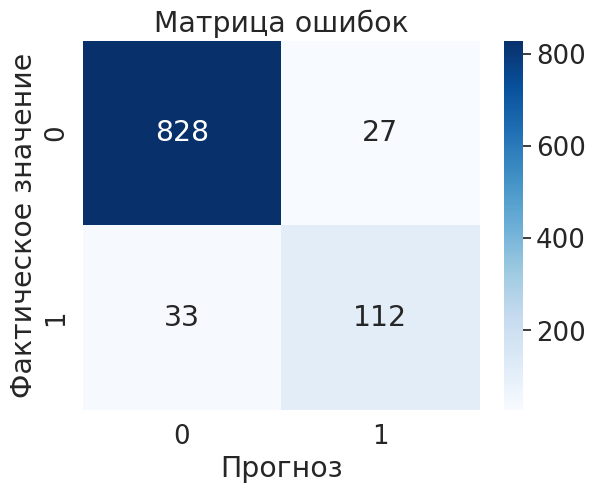

In [98]:
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap = "Blues")
plt.xlabel("Прогноз")
plt.ylabel("Фактическое значение")
plt.title("Матрица ошибок")
plt.show();

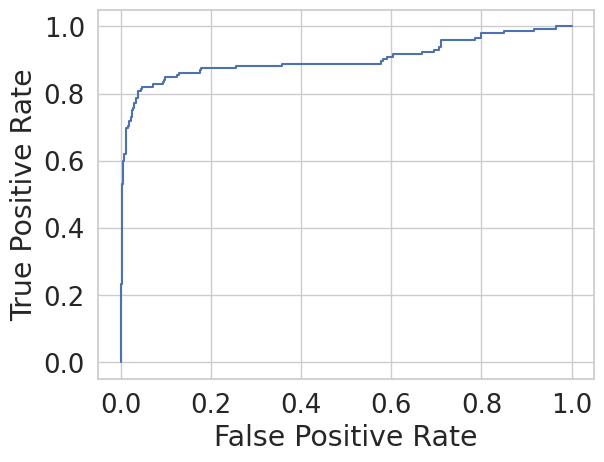

In [99]:
#Предсказываем вероятности
y_pred_proba2 = model2.predict_proba(X_test)[:, 1]
# Строим кривую ROC
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba2)
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [100]:
auc = metrics.roc_auc_score(y_test, y_pred_proba2)
print("AUC: %.3f" % auc)

AUC: 0.903


In [101]:
trace = go.Scatter(x=fpr, y=tpr, mode='lines', name='AUC = %0.2f' % auc,
                   line=dict(color='darkorange', width=2))
reference_line = go.Scatter(x=[0,1], y=[0,1], mode='lines', name='Reference Line',
                            line=dict(color='navy', width=2, dash='dash'))
fig = go.Figure(data=[trace, reference_line])
fig.update_layout(title='Interactive ROC Curve',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')
fig.show()

*Использованная нами выше модель RandomForestClassifier является ансамблевой и использует принцип беггинга - модель много раз обучается на разных наборах данных, после чего итоговый результат образуется с помощью усреднения. Ввиду этого каждый раз при повторном запуске на одних и тех же данных модель выдает разные итоговые значения и метрики качества. Также к ансаблевым моделям относят модели на основе бустинга и стекинга. Разберем их на нашем примере.*

**Бустинг (CatBoost)**

*Бустинг - принцип построения ансамблевых моделей, в основе которого построение множества однородных моделей, где каждая последующая модель обучается на ошибках предыдущих моделей.*

*Одна из самых популярных бустинговых моделей в последнее время - CatBoost, разработанная компанией Yandex. Применим ее для наших данных.*

In [102]:
pip install catboost

In [103]:
from catboost import CatBoostClassifier

*Применим модель со взвешенными по классам весами*

In [104]:
from sklearn.utils.class_weight import compute_class_weight
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

model3 = CatBoostClassifier(iterations=3000, learning_rate=0.05, depth=11, class_weights=class_weights)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

0:	learn: 0.6452237	total: 77.3ms	remaining: 3m 51s
1:	learn: 0.6043313	total: 145ms	remaining: 3m 36s
2:	learn: 0.5672174	total: 205ms	remaining: 3m 24s
3:	learn: 0.5392219	total: 220ms	remaining: 2m 44s
4:	learn: 0.5179966	total: 229ms	remaining: 2m 16s
5:	learn: 0.4882484	total: 297ms	remaining: 2m 28s
6:	learn: 0.4741317	total: 302ms	remaining: 2m 9s
7:	learn: 0.4495384	total: 360ms	remaining: 2m 14s
8:	learn: 0.4280227	total: 418ms	remaining: 2m 18s
9:	learn: 0.4085092	total: 474ms	remaining: 2m 21s
10:	learn: 0.3931368	total: 588ms	remaining: 2m 39s
11:	learn: 0.3768954	total: 692ms	remaining: 2m 52s
12:	learn: 0.3610402	total: 833ms	remaining: 3m 11s
13:	learn: 0.3465840	total: 938ms	remaining: 3m 20s
14:	learn: 0.3342533	total: 1.06s	remaining: 3m 32s
15:	learn: 0.3212551	total: 1.18s	remaining: 3m 39s
16:	learn: 0.3097562	total: 1.3s	remaining: 3m 47s
17:	learn: 0.3005745	total: 1.42s	remaining: 3m 55s
18:	learn: 0.2916569	total: 1.52s	remaining: 3m 58s
19:	learn: 0.2838508	to

In [105]:
confusion_mat = confusion_matrix(y_test, y_pred3)
print("Точность:", accuracy_score(y_test, y_pred3))
print("Точность:", precision_score(y_test, y_pred3, average = 'binary'))
print("Полнота:", recall_score(y_test, y_pred3, average = 'binary'))
print("F1-мера:", f1_score(y_test, y_pred3, average = 'binary'))

Точность: 0.945
Точность: 0.835820895522388
Полнота: 0.7724137931034483
F1-мера: 0.8028673835125448


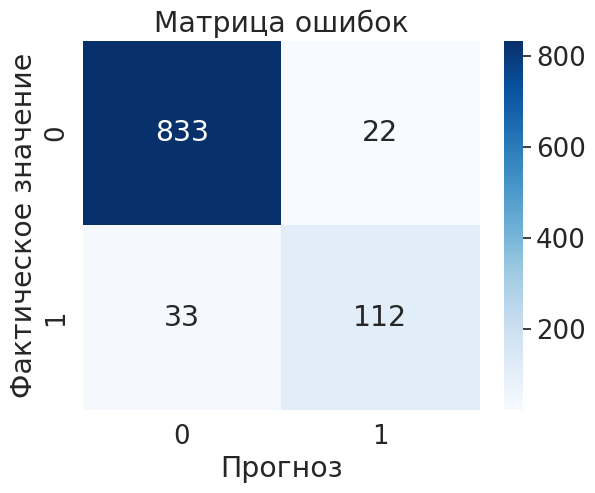

In [106]:
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap = "Blues")
plt.xlabel("Прогноз")
plt.ylabel("Фактическое значение")
plt.title("Матрица ошибок")
plt.show();

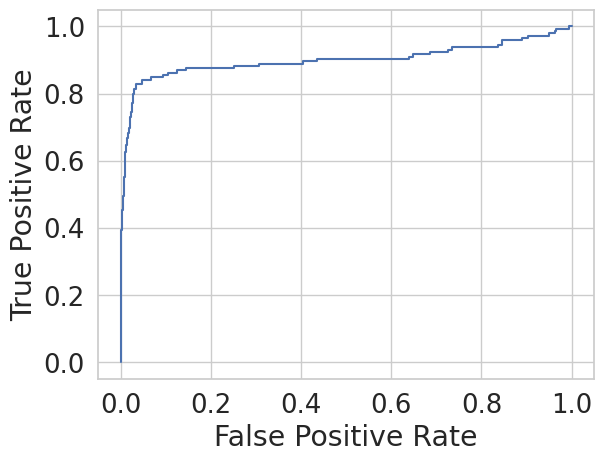

In [107]:
#Предсказываем вероятности
y_pred_proba3 = model3.predict_proba(X_test)[:, 1]
# Строим кривую ROC
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba3)
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [108]:
auc = metrics.roc_auc_score(y_test, y_pred_proba3)
print("AUC: %.3f" % auc)

AUC: 0.900


In [109]:
trace = go.Scatter(x=fpr, y=tpr, mode='lines', name='AUC = %0.2f' % auc,
                   line=dict(color='darkorange', width=2))
reference_line = go.Scatter(x=[0,1], y=[0,1], mode='lines', name='Reference Line',
                            line=dict(color='navy', width=2, dash='dash'))
fig = go.Figure(data=[trace, reference_line])
fig.update_layout(title='Interactive ROC Curve',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')
fig.show()

*При использовании модели CatBoost удается улучшить показатель Recall (долю верных предсказаний реально состоявшихся переходов), но показатель Precision при этом снижается (модель чаще предсказывает переходы в случаях, где их в реальности не было)*

***Стэкинг (StackingClassifier)***

*Еще одним методом построения ансамблевых моделей является стэкинг - двухуровневый подход, когда на первом этапе происходит построение базовых моделей, а затем их результаты передаются в модель второго уровня, которая оптимизирует, исправляет ошибки и строит финальное предсказание.*

*Применим комбинацию - в качестве базовых моделей используем модель дерева решений DecisionTreeClassifier и модель случайного леса RandomForestClassifier, а для обобщения и аггрегации на втором уровне - модель логистической регрессии (LogisticRegression)*

In [123]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Определение базовых моделей
base_models = [
    ('rf', RandomForestClassifier(n_estimators=300, random_state=42)),
    ('dt', DecisionTreeClassifier(max_depth=7, min_samples_leaf=4))
    ]

# Создание модели стекинга
model4 = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
model4.fit(X_train, y_train)

# Предсказания
y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       855
           1       0.92      0.74      0.82       145

    accuracy                           0.95      1000
   macro avg       0.94      0.87      0.90      1000
weighted avg       0.95      0.95      0.95      1000



In [124]:
confusion_mat = confusion_matrix(y_test, y_pred4)
print("Точность:", accuracy_score(y_test, y_pred4))
print("Точность:", precision_score(y_test, y_pred4, average = 'binary'))
print("Полнота:", recall_score(y_test, y_pred4, average = 'binary'))
print("F1-мера:", f1_score(y_test, y_pred4, average = 'binary'))

Точность: 0.954
Точность: 0.9230769230769231
Полнота: 0.7448275862068966
F1-мера: 0.8244274809160306


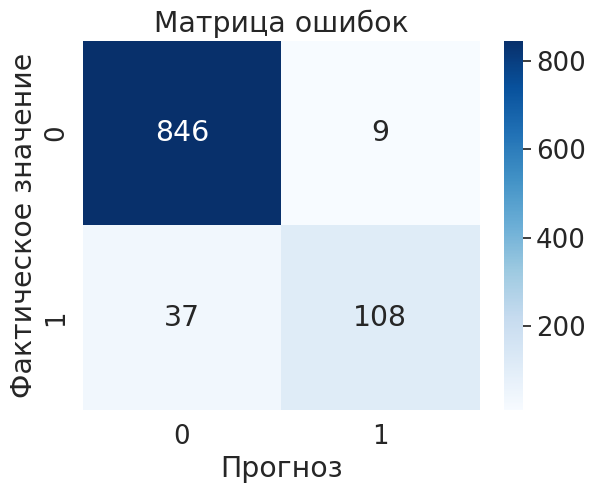

In [125]:
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap = "Blues")
plt.xlabel("Прогноз")
plt.ylabel("Фактическое значение")
plt.title("Матрица ошибок")
plt.show();

*Общее количество ошибок (9+37 = 46) на тестовой выборке в случае применения комбинации моделей минимально по сравнению с ранее расмотренными нами вариантами ансамблей*

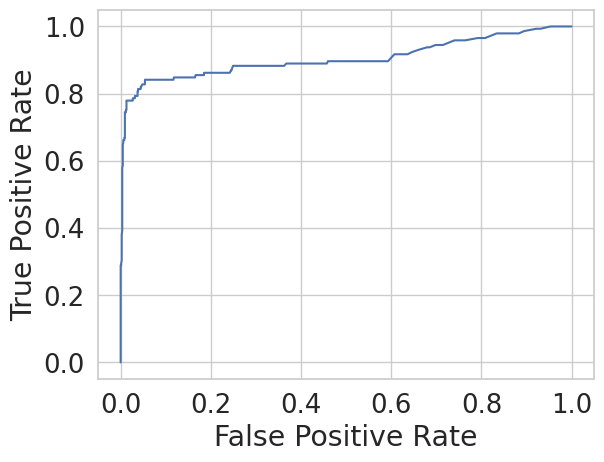

In [126]:
#Предсказываем вероятности
y_pred_proba4 = model4.predict_proba(X_test)[:, 1]
# Строим кривую ROC
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba4)
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [127]:
auc = metrics.roc_auc_score(y_test, y_pred_proba4)
print("AUC: %.3f" % auc)

AUC: 0.905


In [122]:
trace = go.Scatter(x=fpr, y=tpr, mode='lines', name='AUC = %0.2f' % auc,
                   line=dict(color='darkorange', width=2))
reference_line = go.Scatter(x=[0,1], y=[0,1], mode='lines', name='Reference Line',
                            line=dict(color='navy', width=2, dash='dash'))
fig = go.Figure(data=[trace, reference_line])
fig.update_layout(title='Interactive ROC Curve',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')
fig.show()

*В данной работе мы рассмотрели различные варианты посроения ансамблевых моделей в задаче классификации. Применительно к нашим данным построение модели бэггинга (RandomForestClassifier) с параметрами "из коробки" позволило получить максимальный показатель Precision на минорном классе на тестовых данных, то есть из спрогнозированных переходов реальное количество переходов было максимальным. Применение GridSearchCV для поиска оптимальных значений гиперпараметров модели RandomForestClassifier и использование модели бустинга CatBoost позволили улучшить показатель Recall, то есть долю предсказанных переходов из реально состоявшихся, ухудшив при этом показатель Precision. Применение модели стэкинга StackingClassifier (комбинация нескольких моделей) позволило снизить общее количество ошибок модели (неверно предсказанные случаи перехода + непредсказанные случаи перехода к другому оператору).*